<a href="https://colab.research.google.com/github/Zeynep-Dogan/IE-423/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Customer Segmentation:</font>
### <font color='#475468'> Can you cluster customers by purchasing behavior?</font>

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfSales =  pd.read_csv('/content/drive/MyDrive/ie 423/Black Friday Sales Data_Task3.csv', encoding = "ISO-8859-1")

In [4]:
dfSales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Prepare Data

Previously, we said that categories 2 and 3 can be redundant since they are not really correlated with the purchase (since the MAE is best when we drop those columns).

So, we will start by dropping those columns to extract proper data.

In [5]:
dfSalesdrop = dfSales.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
dfSalesdrop.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
dfPurchase = (dfSalesdrop.groupby('User_ID').agg({'User_ID':'count','Purchase':'sum'})
             .rename(columns={'User_ID':'Number of Purchases', 'Purchase':'Amount of Money the User Spent'})
            )
dfPurchase

,Number of Purchases,Amount of Money the User Spent
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


In [7]:
# Scale data

X = dfPurchase
X[X.columns] = scale(X[X.columns])

Since we don't have the previously defined Target values and indication of prior grouping of the users, we are going to approach this data set by *Unsupervised Learning* manner.

Text(0, 0.5, 'Amount of Money the User Spent')

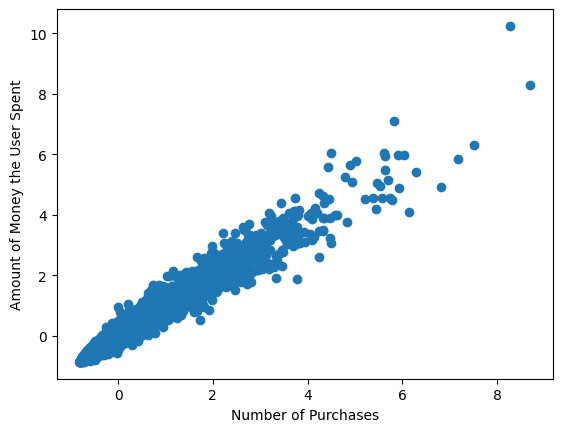

In [8]:
# Visualize scatterplot

plt.scatter(X['Number of Purchases'],X['Amount of Money the User Spent'])
plt.xlabel('Number of Purchases')
plt.ylabel('Amount of Money the User Spent')

First, we need to assign users randomly and then *Iteratively* improve the result in order to cluster them.

### K-Means Clustering

The method of randomly assigning users to 'n' clusters, then reassigning them to another cluster that it is closer to, and repeating this process until no more improvements are possible is called **K-Means Clustering**.

In [9]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcPurchase = KMeans(n_clusters=3, random_state=1)
mdlKmcPurchase.fit(X)
kMeans_labels = mdlKmcPurchase.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

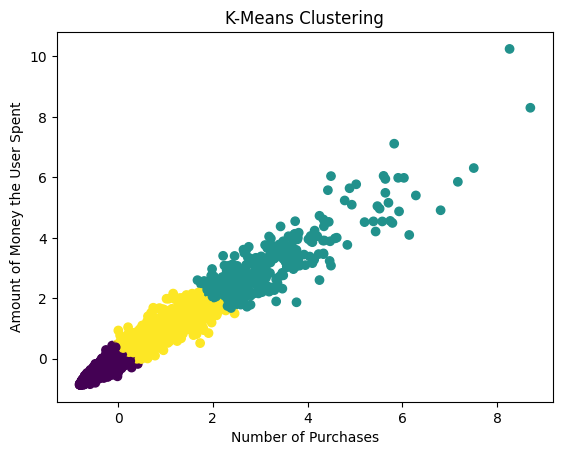

In [10]:
# Display k-Means cluster on scatter plot

plt.scatter(X['Number of Purchases'],X['Amount of Money the User Spent'],c=kMeans_labels)
plt.xlabel('Number of Purchases')
plt.ylabel('Amount of Money the User Spent')
plt.title('K-Means Clustering')

We will be using the **Silhouette Score** to measure how similar an object is to its own cluster (which is called cohesion) compared to other clusters (which is called separation). By this score we will be calculating the accuracy of the clustering methods.

If the Silhouette Score is high it means the user is correctly assigned to its own cluster and poorly assigned to other neighboring clusters.

In [11]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcPurchase.labels_)

0.6652767061197826

In [12]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcPurchase = KMeans(n_clusters=k, random_state=1)
    mdlKmcPurchase.fit(X)
    kMeans_labels = mdlKmcPurchase.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcPurchase.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [14]:
# Iterate over different values of k to determine best silhouette score

for k in range(2, 11):
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.7261408452722743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.6652767061197826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.6076933751194181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5846368698345823


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.5749005958029301


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  7 		 Silhouette Score:  0.5486543613158262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  8 		 Silhouette Score:  0.5271799204944363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  9 		 Silhouette Score:  0.5186543725443591


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  10 		 Silhouette Score:  0.5161178586129308


As the number of the clusters increases the score drops.

So, the best cluster size is '2' with a Silhouette Score of approximately 0.73 which is also not that high.

We need to check whether there is any other method which gives a higher score.

### Hierarchical Clustering

**Hierarchical clustering**, is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

In [15]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Dendrogram is a graph that shows the clusters in hierarchical clustering. How many clusters you want at the end can be adjusted.

Text(0.5, 1.0, 'Hierarchical Clustering')

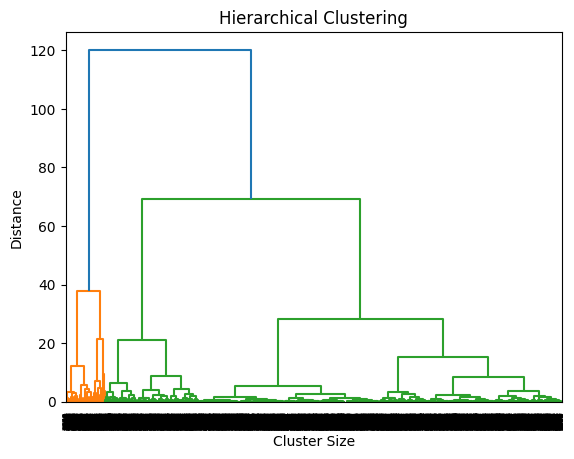

In [16]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

The clusters are more further away if the y-axis distance is greater
Furthermore, the dendrogram demonstrates that 2 clusters are okay but 4 clusters can be also considered.

As I mentioned, number of clusters can be adjusted while building a hierarchical clustering model since it would take longer to build the whole dendrogram.

We will be assigning the number of clusters especially because of the large datasets we have.

In [31]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcPurchase = AgglomerativeClustering(n_clusters=4)
mdlHrcPurchase.fit(X)
hClust_labels = mdlHrcPurchase.labels_

In [32]:
silhouette_score(X, mdlHrcPurchase.labels_)

0.6399901867458228

In [33]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcPurchase = AgglomerativeClustering(n_clusters=2)
mdlHrcPurchase.fit(X)
hClust_labels = mdlHrcPurchase.labels_

In [34]:
silhouette_score(X, mdlHrcPurchase.labels_)

0.7454258816188772

Text(0.5, 1.0, 'Hierarchical Clustering')

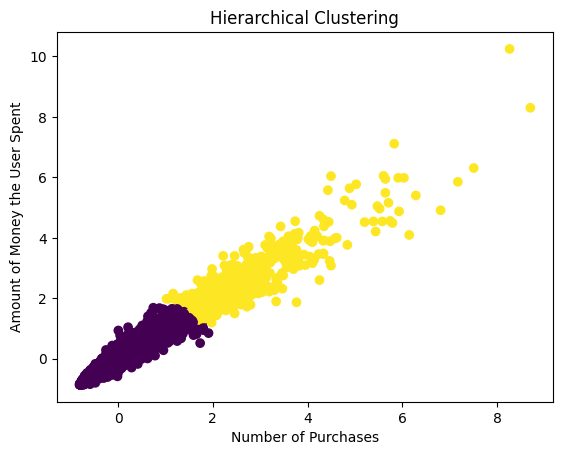

In [35]:
# Display Hierarchical cluster on scatter plot

plt.scatter(X['Number of Purchases'],X['Amount of Money the User Spent'],c=hClust_labels)
plt.xlabel('Number of Purchases')
plt.ylabel('Amount of Money the User Spent')
plt.title('Hierarchical Clustering')

2 clusters has a score higher than 4 clusters. So, we need to again check how many clusters gives the best Silhouette Score.

In [36]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcPurchase = AgglomerativeClustering(n_clusters=k)
    mdlHrcPurchase.fit(X)
    hClust_labels = mdlHrcPurchase.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcPurchase.labels_)
    return (hClust_labels, hClust_sil_score)

In [37]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.7454258816188772
k:  3 		 Silhouette Score:  0.6415136338507116
k:  4 		 Silhouette Score:  0.6399901867458228
k:  5 		 Silhouette Score:  0.506267207431757
k:  6 		 Silhouette Score:  0.5070500323467254


This means that 2 clusters again give the highest Silhouette Score which is approximately 0.75. This is higher than K-Means Clustering but again not that high.

We can follow a more human-like approach and think how humans group data points together.  We normally draw a boundary around the dense regions and ignore anomalous datapoints which are far away from the dense regions.  Such models are known as density based models which are ideal for data that follows patterns.

### DBScan Clustering and Anomaly Detection

DBScan stands for Density-Based Spatial Clustering of Applications with Noise.  Given a set of points in some space, it groups together points that are closely packed together, marking as outliers points (which are called noice) that lie alone in low-density regions (whose nearest neighbors are too far away).

In [38]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsPurchase = DBSCAN(eps=0.2)
mdlDbsPurchase.fit(X)
dbscan_labels = mdlDbsPurchase.labels_

In [39]:
silhouette_score(X, dbscan_labels)

0.6568861530009426

This is less than both of the scores we can from previous methods.

In [40]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

4

We have 4 clusters with this model.

In [41]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

60

And 60 outliers.

Text(0.5, 1.0, 'DBScan Clustering')

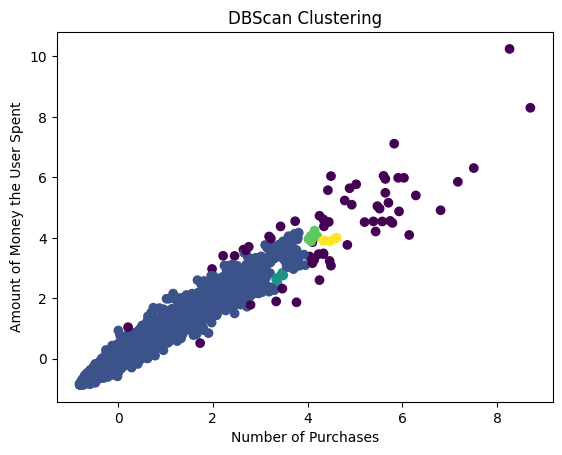

In [42]:
# Display DBScan cluster on scatter plot

plt.scatter(X['Number of Purchases'],X['Amount of Money the User Spent'],c=dbscan_labels)
plt.xlabel('Number of Purchases')
plt.ylabel('Amount of Money the User Spent')
plt.title('DBScan Clustering')

Again we will check for the number of clusters which gives the highest Silhouette Score.

In [43]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsPurchase = DBSCAN(eps=e)
    mdlDbsPurchase.fit(X)
    dbscan_labels = mdlDbsPurchase.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [44]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  10 	 Noise:  255 	 Silhouette Score:  0.5661972006437398
eps:  0.2 	 Clusters:  4 	 Noise:  60 	 Silhouette Score:  0.6568861530009426
eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658
eps:  0.4 	 Clusters:  3 	 Noise:  20 	 Silhouette Score:  0.7872811055480032
eps:  0.5 	 Clusters:  3 	 Noise:  15 	 Silhouette Score:  0.7927236996940684
eps:  0.6 	 Clusters:  3 	 Noise:  7 	 Silhouette Score:  0.7943119387842261
eps:  0.7 	 Clusters:  2 	 Noise:  6 	 Silhouette Score:  0.8011975322057425


When we have 2 clusters we get the highest Silhouette Score in the DBScan model which is approximately 0.80.

This is again not that high but the DBScan model gave the highest score among all the models. The model is also useful in determining outliers.  

This suggest that the approach that humans usually uses works the best and the importance of density while clustering datasets.